### Set working directory and import packages

In [1]:
## Set path
import os
from pathlib import Path

current_directory = Path.cwd()
if current_directory.name == "MT":
    # This means that the notebook is run from the main anomalib directory.
    root_directory = current_directory.parent
elif current_directory.name == "anomalib":
    # This means that the notebook is run from the main anomalib directory.
    root_directory = current_directory
    print("here")

os.chdir(root_directory)
root_directory

PosixPath('/home/wueesmat/MT/anomalib')

In [2]:
os.getcwd()

'/home/wueesmat/MT/anomalib'

In [3]:
# Import the required modules
import numpy as np
from MT.refinement import train_and_evaluate_model_blind, train_and_evaluate_model_SRR_light
from MT.plotting import plot_performance_vs_contamination_few_categories

Could not find wandb. To use this feature, ensure that you have wandb installed.
Could not find openvino. To use this feature, ensure that you have openvino installed.
OpenVINO is not installed. Please install OpenVINO to use OpenVINOInferencer.


In [4]:
## Import the required modules
#import numpy as np
import matplotlib.pyplot as plt
#import torch
#from lightning.pytorch import Trainer, seed_everything
#from anomalib.data import MVTec
#from anomalib.data.image.mvtec import MVTec_contaminated, MVTecDataset_contaminated, make_mvtec_dataset, make_mvtec_dataset_contaminated
#from anomalib.models import Padim, Patchcore, Stfpm, Draem, EfficientAd
#from anomalib.engine import Engine
#from anomalib import TaskType
#
#from anomalib.data.utils import Split
# from pathlib import Path
# import pandas as pd


### Define Experiment

In [6]:
# #Define experiment
# run_arr = np.array([1]) #np.array([1, 2, 3, 4, 5]) #np.array([1, 2]) #np.array([1]) #np.array([1]) #np.array([42])#np.arange(3)+1
# cont_ratio_arr = np.array([0.15]) #np.array([0.0, 0.05, 0.1, 0.15]) #np.array([0.0, 0.15])#np.array([0.15])#, 0.1]) #, 0.15
# category_arr = np.array(["screw"])#np.array(["wood", "cable", "metal_nut", "screw"])#, "carpet", "grid", "leather", "tile", "wood", "bottle", "cable", "capsule", "hazelnut", "metal_nut", "pill", "screw", "toothbrush", "transistor", "zipper"])#np.array(["carpet", "grid"])#np.array(["metal_nut"])#, "grid"])# #
# results_blind_arr = np.empty([run_arr.shape[0], cont_ratio_arr.shape[0], category_arr.shape[0]])
# results_refined_arr = np.empty([run_arr.shape[0], cont_ratio_arr.shape[0], category_arr.shape[0]])

### Run Experiment (SRR light): Performance vs. k

In [5]:
run_arr = np.array([1])#np.array([1, 2, 3])#, 4, 5]) # np.array([1, 2])#, 2])#
category_arr = np.array(["cable"])#np.array(["cable", "wood", "metal_nut"])


In [6]:
# Initialize arrays for saving
results_test_blind_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
results_test_refined_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
keep_indices_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
train_dataset_length_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
abnormal_total_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
abnormal_excluded_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
normal_total_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
normal_excluded_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
k_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)

In [ ]:
# Loop over experiments
for idx_category, category in enumerate(category_arr):
    for idx_run, run in enumerate(run_arr):

        print("+---------------------+")
        print("| category: ", category, " |")
        print("| run: ", run, "       |")
        print("+---------------------+")
        

        ## Loop
        cont_ratio = 0.15
        coreset_sampling_ratio = 0.01

        # Define refinement
        k_ls = [1, 2, 3, 5, 10]
        #k_ls = [1, 2, 3, 5, 10]
        #k_ls = [1, 2, 3, 5, 10, 20, 40]
        gamma = 1-cont_ratio

        # Lists to save results
        results_test_blind_ls=[]
        results_test_refined_ls=[]
        keep_indices_ls=[]
        train_dataset_length_ls=[]
        abnormal_total_ls=[]
        abnormal_excluded_ls=[]
        normal_total_ls=[]
        normal_excluded_ls=[]

        # Evaluate Blind
        results_test_blind = train_and_evaluate_model_blind(coreset_sampling_ratio, run, category, cont_ratio)

        # Evaluate SRR Light
        for k in k_ls:
            results_test_refined, keep_indices, abnormal_total, abnormal_excluded, normal_total, normal_excluded = train_and_evaluate_model_SRR_light(k, gamma, coreset_sampling_ratio, run, category, cont_ratio)

            ## Save results
            results_test_blind_ls.append(results_test_blind)
            results_test_refined_ls.append(results_test_refined)
            keep_indices_ls.append(keep_indices)
            abnormal_total_ls.append(abnormal_total)
            abnormal_excluded_ls.append(abnormal_excluded)
            normal_total_ls.append(normal_total)
            normal_excluded_ls.append(normal_excluded)


        ## Save results in array
        results_test_blind_arr[idx_run, idx_category] = results_test_blind_ls
        results_test_refined_arr[idx_run, idx_category] = results_test_refined_ls
        keep_indices_arr[idx_run, idx_category] = keep_indices_ls
        abnormal_total_arr[idx_run, idx_category] = abnormal_total_ls
        abnormal_excluded_arr[idx_run, idx_category] = abnormal_excluded_ls
        normal_total_arr[idx_run, idx_category] = normal_total_ls
        normal_excluded_arr[idx_run, idx_category] = normal_excluded_ls
        k_arr[idx_run, idx_category] = k_ls


## Save arrays in dict
results_dict = {
    "dimensions": {
        "run_arr": run_arr,
        "category_arr": category_arr
        
    },
    "results": {
        "results_test_blind_arr": results_test_blind_arr,
        "results_test_refined_arr": results_test_refined_arr,
        "keep_indices_arr": keep_indices_arr,
        "abnormal_total_arr": abnormal_total_arr,
        "abnormal_excluded_arr": abnormal_excluded_arr,
        "normal_total_arr": normal_total_arr,
        "normal_excluded_arr":   normal_excluded_arr,
        "k_arr": k_arr
    }
}



#### Save Results

In [10]:
# Define path
save_folder = "./results/Patchcore/"
name = "20240417_Patchcore_SRR_cable_run123_k_1_10.pickle"
target_path = os.path.join(save_folder, name)

In [12]:
# Save results
import pickle
with open(target_path, "wb") as pickle_file:
    pickle.dump(results_dict, pickle_file)

#### Load Results

In [5]:
# Define path
load_folder = "./results/Patchcore/"
name = "20240417_Patchcore_SRR_cable_run12345_k_1_40.pickle"
source_path = os.path.join(load_folder, name)

In [6]:
# Load results
import pickle
pickle_file_path = source_path
with open(pickle_file_path, "rb") as pickle_file:
    loaded_dict = pickle.load(pickle_file)


In [16]:
results_dict = loaded_dict

In [18]:
results_dict

{'dimensions': {'run_arr': array([1, 2, 3, 4, 5]),
  'category_arr': array(['cable', 'wood', 'metal_nut'], dtype='<U9')},
 'results': {'results_test_blind_arr': array([[list([[{'image_AUROC': 0.9697462916374207, 'image_AUPR': 0.9630407094955444, 'image_F1Score': 0.9333333373069763}], [{'image_AUROC': 0.9697462916374207, 'image_AUPR': 0.9630407094955444, 'image_F1Score': 0.9333333373069763}], [{'image_AUROC': 0.9697462916374207, 'image_AUPR': 0.9630407094955444, 'image_F1Score': 0.9333333373069763}], [{'image_AUROC': 0.9697462916374207, 'image_AUPR': 0.9630407094955444, 'image_F1Score': 0.9333333373069763}], [{'image_AUROC': 0.9697462916374207, 'image_AUPR': 0.9630407094955444, 'image_F1Score': 0.9333333373069763}], [{'image_AUROC': 0.9697462916374207, 'image_AUPR': 0.9630407094955444, 'image_F1Score': 0.9333333373069763}], [{'image_AUROC': 0.9697462916374207, 'image_AUPR': 0.9630407094955444, 'image_F1Score': 0.9333333373069763}]]),
          list([[{'image_AUROC': 0.9969041347503662, 

In [33]:
abnormal_excluded_arr.shape

(5, 3)

In [24]:
k_arr[0, ]


array([list([1, 2, 3, 5, 10, 20, 40]), list([1, 2, 3, 5, 10, 20, 40]),
       list([1, 2, 3, 5, 10, 20, 40])], dtype=object)

In [9]:
## Load results dicts
# Load dimensions
for key, value in results_dict["dimensions"].items():
    # Create variables dynamically using locals() function
    locals()[key] = value
# Load results
for key, value in results_dict["results"].items():
    # Create variables dynamically using locals() function
    locals()[key] = value

In [10]:
print(run_arr)
print(category_arr)


[1 2 3 4 5]
['cable' 'wood' 'metal_nut']


#### Plot Performance vs. Ensemble Count

In [68]:
# Define category to plot
idx_category = 2


In [69]:
# Extract performance values using nested list comprehensions
performance_refined_arr = np.array([[entry[0]['image_AUROC'] for entry in row] for row in results_test_refined_arr[:, idx_category][:]])
performance_blind_arr = np.array([[entry[0]['image_AUROC'] for entry in row] for row in results_test_blind_arr[:, idx_category][:]])
print(performance_refined_arr)
print(performance_blind_arr)

[[0.99669421 0.9983471  1.00000012 0.99669427 1.00000012 0.99752063
  0.94462818]
 [0.97107434 1.00000012 1.00000012 1.00000012 0.99917364 0.99917364
  0.98181808]
 [0.99752063 0.99421483 0.99504131 0.99834716 0.99752069 0.98760331
  0.9818182 ]
 [0.99421489 1.00000012 1.00000012 1.00000012 1.00000012 1.00000012
  0.9983471 ]
 [0.9983471  1.00000012 1.00000012 0.99752069 0.9983471  0.99834716
  0.99256194]]
[[0.97685945 0.97685945 0.97685945 0.97685945 0.97685945 0.97685945
  0.97685945]
 [0.98429745 0.98429745 0.98429745 0.98429745 0.98429745 0.98429745
  0.98429745]
 [0.99421489 0.99421489 0.99421489 0.99421489 0.99421489 0.99421489
  0.99421489]
 [0.99173546 0.99173546 0.99173546 0.99173546 0.99173546 0.99173546
  0.99173546]
 [0.9801653  0.9801653  0.9801653  0.9801653  0.9801653  0.9801653
  0.9801653 ]]


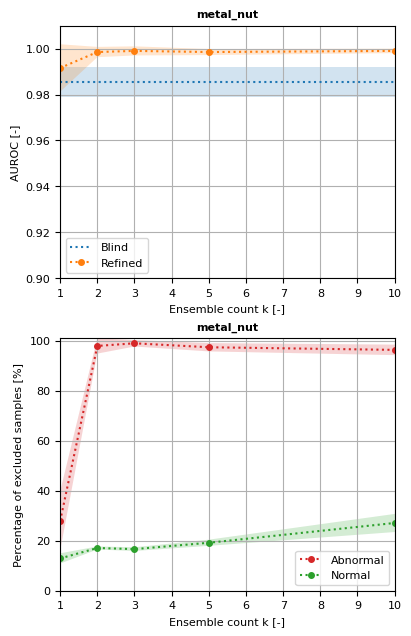

In [70]:
%matplotlib inline 
# Plot setttings
fontsize = 8
markersize = 4

# Prepare data
splits = k_arr[0, idx_category]   ### TODO: adapt
performance_blind_mean = np.mean(performance_blind_arr, axis=0)
performance_blind_std = np.std(performance_blind_arr, axis=0)
performance_refined_mean = np.mean(performance_refined_arr, axis=0)
performance_refined_std = np.std(performance_refined_arr, axis=0)

# Plot data
fig, axs = plt.subplots(2, 1, figsize=(4,6.25), constrained_layout=True)
axs[0].plot(splits, performance_blind_mean, label="Blind", color='C0', markersize = markersize, linestyle='dotted')
axs[0].fill_between(splits, performance_blind_mean-performance_blind_std, performance_blind_mean+performance_blind_std, color='C0', alpha=0.2, linewidth=0.0)
axs[0].plot(splits, performance_refined_mean, marker="o", label="Refined", color='C1', markersize = markersize, linestyle='dotted')
axs[0].fill_between(splits, performance_refined_mean-performance_refined_std, performance_refined_mean+performance_refined_std, color='C1', alpha=0.2, linewidth=0.0)

# Format plot
axs[0].grid()
axs[0].set_title(str(category_arr[idx_category]), fontsize=fontsize, fontweight="bold")
axs[0].legend(fontsize=fontsize)
#axs[0].set_xlim([min(splits), max(splits)])
axs[0].set_xlim([min(splits), 10])
axs[0].set_ylim([0.9, 1.01])
axs[0].set_xlabel("Ensemble count k [-]", fontsize=fontsize)
axs[0].set_ylabel("AUROC [-]", fontsize=fontsize)
axs[0].xaxis.set_tick_params(labelsize=fontsize)
axs[0].yaxis.set_tick_params(labelsize=fontsize)


# Prepare data
excluded_perc_abnormal_arr = np.array([[item for item in sublist[idx_category]] for sublist in abnormal_excluded_arr]) / np.array([[item for item in sublist[idx_category]] for sublist in abnormal_total_arr])*100
excluded_perc_normal_arr = np.array([[item for item in sublist[idx_category]] for sublist in normal_excluded_arr]) / np.array([[item for item in sublist[idx_category]] for sublist in normal_total_arr])*100

excluded_perc_abnormal_mean = np.mean(excluded_perc_abnormal_arr, axis=0)
excluded_perc_abnormal_std = np.std(excluded_perc_abnormal_arr, axis=0)
excluded_perc_normal_mean = np.mean(excluded_perc_normal_arr, axis=0)
excluded_perc_normal_std = np.std(excluded_perc_normal_arr, axis=0)

# Plot data
axs[1].plot(splits, excluded_perc_abnormal_mean, marker="o", label="Abnormal", color='C3', markersize = markersize, linestyle='dotted')
axs[1].fill_between(splits, excluded_perc_abnormal_mean-excluded_perc_abnormal_std, excluded_perc_abnormal_mean+excluded_perc_abnormal_std, color='C3', alpha=0.2, linewidth=0.0)
axs[1].plot(splits, excluded_perc_normal_mean, marker="o", label="Normal", color='C2', markersize = markersize, linestyle='dotted')
axs[1].fill_between(splits, excluded_perc_normal_mean-excluded_perc_normal_std, excluded_perc_normal_mean+excluded_perc_normal_std, color='C2', alpha=0.2, linewidth=0.0)

# Format plot
axs[1].grid()
axs[1].set_title(str(category_arr[idx_category]), fontsize=fontsize, fontweight="bold")
axs[1].legend(fontsize=fontsize)
#axs[1].set_xlim([min(splits), max(splits)])
axs[1].set_xlim([min(splits), 10])
axs[1].set_ylim([0, 101])
axs[1].set_xlabel("Ensemble count k [-]", fontsize=fontsize)
axs[1].set_ylabel("Percentage of excluded samples [%]", fontsize=fontsize)
axs[1].xaxis.set_tick_params(labelsize=fontsize)
axs[1].yaxis.set_tick_params(labelsize=fontsize)

### Run Experiment (SRR light): Performance vs. Anomaly Ratio

In [25]:
# Define path
save_folder = "./results/Patchcore/"
name = "20240418_Patchcore_cable_wood_metalnut_cont_max_0.15_runs_05_sampling_ratio_0.01_no_refinement.npy"
name_refined = "20240418_Patchcore_all_categories_cont_max_0.15_runs_05_sampling_ratio_0.01_SRR_refinement.npy"
file_path_blind = os.path.join(save_folder, name)
file_path_refined = os.path.join(save_folder, name_refined)

In [26]:
#Define experiment
run_arr = np.array([1, 2]) #np.array([1, 2, 3, 4, 5]) 
cont_ratio_arr = np.array([0.0, 0.15]) #np.array([0.0, 0.05, 0.1, 0.15]) 
category_arr = np.array(["cable", "wood", "metal_nut"]) #np.array(["carpet", "grid", "leather", "tile", "wood", "bottle", "cable", "capsule", "hazelnut", "metal_nut", "pill", "screw", "toothbrush", "transistor", "zipper"])#np.array(["carpet", "grid"])#np.array(["metal_nut"])#, "grid"])# #
results_blind_arr = np.empty([run_arr.shape[0], cont_ratio_arr.shape[0], category_arr.shape[0]])
results_refined_arr = np.empty([run_arr.shape[0], cont_ratio_arr.shape[0], category_arr.shape[0]])

In [ ]:


for idx_run, run in enumerate(run_arr):
    for idx_cont_ratio, cont_ratio in enumerate(cont_ratio_arr):
        for idx_category, category in enumerate(category_arr):

            print("+-----------------------+")
            print("| run: ", run, "         |")
            print("| cont_ratio: ", cont_ratio, "   |")
            print("| category: ", category, "   |")
            print("+-----------------------+")

            # Define refinement
            coreset_sampling_ratio = 0.01
            gamma = 1-cont_ratio
            k = 2

            # Evaluate Blind
            results_test_blind = train_and_evaluate_model_blind(coreset_sampling_ratio, run, category, cont_ratio)
            results_blind_arr[idx_run, idx_cont_ratio, idx_category] = results_test_blind[0]["image_AUROC"]

            # Evaluate SRR Light
            results_test_refined, _, _, _, _, _ = train_and_evaluate_model_SRR_light(k, gamma, coreset_sampling_ratio, run, category, cont_ratio)
            results_refined_arr[idx_run, idx_cont_ratio, idx_category] = results_test_refined[0]["image_AUROC"]
            

# Save results_arr to the specified folder
np.save(file_path_blind, results_blind_arr)
np.save(file_path_refined, results_refined_arr)




In [65]:
cont_ratio_arr

array([0.  , 0.15])

In [73]:
def plot_performance_vs_contamination_few_categories(performance_blind_arr, 
                                                   performance_refined_arr, 
                                                   ratio_labels=np.array([0, 5, 10, 15]), 
                                                   category_labels = np.array(["cable", "wood", "metal_nut"])
                                                   ):
    """Plot performance as a function of the anomaly ratio.
    Args:
        results_arr (numpy array): (runs, contamination ratios, categories)
        ratio_labels (numpy array): 
            Defaults to np.array([0, 5, 10, 15)
        category_labels (numpy array): 
            Defaults to np.array(["Carpet", "Grid", "Leather", "Tile", "Wood", "Bottle", "Cable", "Capsule", "Hazelnut", "Metal nut",  "Pill",  "Screw",  "Toothbrush", "Transistor",  "Zipper"])
    """
    %matplotlib inline 
    # Plot setttings
    fontsize = 8
    markersize = 4
    n_col = results_blind_arr.shape[2]

    # Prepare plots
    fig, axs = plt.subplots(1, n_col, figsize=(8, 2), constrained_layout=True)

    for category_idx in np.arange(category_labels.shape[0]):

        # Prepare data per category
        ratios = ratio_labels*100
        performance_blind_mean = np.mean(performance_blind_arr[:,:,category_idx], axis=0)
        performance_blind_std = np.std(performance_blind_arr[:,:,category_idx], axis=0)
        performance_refined_mean = np.mean(performance_refined_arr[:,:,category_idx], axis=0)
        performance_refined_std = np.std(performance_refined_arr[:,:,category_idx], axis=0)


        sx = category_idx

        ## Plot data
        #axs[sx].plot(ratios, performance_mean, marker="o", label="PatchCore", color='C0', markersize = markersize, linestyle='dotted')
        #axs[sx].fill_between(ratios, performance_mean-performance_std, performance_mean+performance_std, color='C0', alpha=0.2, linewidth=0.0)
        
        # Plot data
        axs[sx].plot(ratios, performance_blind_mean, marker="o", label="Blind", color='C0', markersize = markersize, linestyle='dotted')
        axs[sx].fill_between(ratios, performance_blind_mean-performance_blind_std, performance_blind_mean+performance_blind_std, color='C0', alpha=0.2, linewidth=0.0)
        axs[sx].plot(ratios, performance_refined_mean, marker="o", label="Refined", color='C1', markersize = markersize, linestyle='dotted')
        axs[sx].fill_between(ratios, performance_refined_mean-performance_refined_std, performance_refined_mean+performance_refined_std, color='C1', alpha=0.2, linewidth=0.0)


        # Format plot
        axs[sx].grid()
        axs[sx].set_title(category_labels[category_idx], fontsize=fontsize, fontweight="bold")
        axs[sx].legend(fontsize=fontsize, loc="lower left")
        axs[sx].set_xlim([-0.5, 15.5])
        axs[sx].set_ylim([0.9, 1.01])
        axs[sx].set_xlabel("Anomaly ratio [%]", fontsize=fontsize)
        axs[sx].set_ylabel("AUROC [-]", fontsize=fontsize)
        axs[sx].xaxis.set_tick_params(labelsize=fontsize)
        axs[sx].yaxis.set_tick_params(labelsize=fontsize)


        

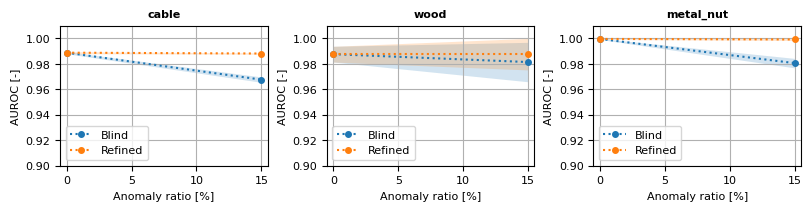

In [74]:
plot_performance_vs_contamination_few_categories(performance_blind_arr=results_blind_arr, 
                                                   performance_refined_arr = results_refined_arr,
                                                   ratio_labels=cont_ratio_arr, 
                                                   category_labels = category_arr)

In [ ]:
#### BACKUP
#import logging
#logger = logging.getLogger(__name__)
#
## Link: https://pytorch.org/blog/understanding-gpu-memory-1/ 
## Start recording memory snapshot history, initialized with a buffer
## capacity of 100,000 memory events, via the `max_entries` field.
#torch.cuda.memory._record_memory_history(
#    max_entries=100000
#)
#
#
#try:
#    torch.cuda.memory._dump_snapshot("snapshot.pickle")
#except Exception as e:
#    logger.error(f"Failed to capture memory snapshot {e}")
#
#for idx_category, category in enumerate(category_arr):
#    for idx_run, run in enumerate(run_arr):
#
#        print("category: ", category)
#        print("run: ", run)
#        
#
#        ## Loop
#        #run = 1
#        cont_ratio = 0.15
#        #category="cable"# "cable"
#        coreset_sampling_ratio = 0.01
#
#        ## Define refinement
#        #k_ls = [1, 2, 3, 5, 8] #k_arr = np.array([1, 2, 4, 8]) #np.array([1, 2, 3, 4, 5, 8, 10, 15])
#        k_ls = [1, 2]
#        #k_ls = [1, 2, 3, 5, 10, 20] 
#        gamma = 1-cont_ratio
#
#        ## Lists to save results
#        results_test_blind_ls=[]
#        results_test_refined_ls=[]
#        keep_indices_ls=[]
#        train_dataset_length_ls=[]
#        abnormal_total_ls=[]
#        abnormal_excluded_ls=[]
#        normal_total_ls=[]
#        normal_excluded_ls=[]
#
#
#        ## Evaluate baseline (blind training)
#        # Train one model on refined dataset
#        seed_everything(run, workers=True)
#        datamodule_blind = MVTec_contaminated(category=category, cont_ratio=cont_ratio, run=run, idx=[])
#        model_blind = Patchcore(coreset_sampling_ratio=coreset_sampling_ratio)
#        engine_blind = Engine(task=TaskType.CLASSIFICATION, image_metrics=["AUROC", "AUPR", "F1Score"], max_epochs=10, devices=1)
#        engine_blind.fit(datamodule=datamodule_blind, model=model_blind)
#
#        # Evaluate model on test set
#        results_test_blind = engine_blind.test(
#            model=model_blind,
#            datamodule=datamodule_blind,
#            ckpt_path=engine_blind.trainer.checkpoint_callback.best_model_path,
#            verbose=False
#        )
#        
#
#
#        for k in k_ls:
#            print("k: ", k)
#            #torch.cuda.empty_cache()
#            # Create indices for k disjoint datasets
#            train_dataset = MVTecDataset_contaminated(
#                    task=TaskType.CLASSIFICATION,
#                    split=Split.TRAIN,
#                    category=category,
#                    cont_ratio=cont_ratio,
#                    run=run,
#                    idx = []           
#                )
#            train_dataset_length = train_dataset.__len__()
#            indices = np.arange(0, train_dataset_length)
#            np.random.seed(run)
#            np.random.shuffle(indices)
#            indices_disjoint_datasets = np.array_split(indices, k)
#            #torch.cuda.empty_cache()
#
#            # Train k models on k disjoint datasets
#            classifications_subset_arr = np.empty([train_dataset_length,k], dtype=bool)
#            for k_iter in range(k):
#                print("k_iter: ", k_iter)
#                #torch.cuda.empty_cache()
#                # Train model on disjoint dataset
#                seed_everything(run, workers=True)
#                datamodule_subset = MVTec_contaminated(category=category, cont_ratio=cont_ratio, run=run, idx=indices_disjoint_datasets[k_iter])
#                model_subset = Patchcore(coreset_sampling_ratio=coreset_sampling_ratio) 
#                engine_subset = Engine(task=TaskType.CLASSIFICATION, image_metrics=["AUROC", "AUPR", "F1Score"], max_epochs=10, devices=1)
#                engine_subset.fit(datamodule=datamodule_subset, model=model_subset)
#
#                # Predict binary labels for each sample
#                predictions_subset = engine_subset.predict(model=model_subset, dataset=train_dataset)
#                prediction_scores_subset = np.array([d["pred_scores"][0] for d in predictions_subset])
#                threshold = np.percentile(prediction_scores_subset, q=gamma*100)
#                classifications_subset = prediction_scores_subset>threshold # True: abnormal; False: normal
#
#                # Save binary classifications
#                classifications_subset_arr[:,k_iter] = classifications_subset
#                #torch.cuda.empty_cache()
#
#            # Return indices of refined dataset
#            keep_bool_arr = np.all(~classifications_subset_arr, axis=1)
#            keep_indices = np.where(keep_bool_arr)[0]
#
#
#            # Evaluate correctness of pseudo-labels
#            abnormal_total = 0
#            abnormal_excluded = 0
#            normal_total = 0
#            normal_excluded = 0
#            #torch.cuda.empty_cache()
#            for i in range(train_dataset.__len__()):
#
#                if train_dataset.__getitem__(i)["label"] == 1:
#                    abnormal_total += 1
#                    if ~np.isin(i, keep_indices):
#                        abnormal_excluded += 1
#                elif train_dataset.__getitem__(i)["label"] == 0:
#                    normal_total += 1
#                    if ~np.isin(i, keep_indices):
#                        normal_excluded += 1
#            
#            try:
#                torch.cuda.memory._dump_snapshot("snapshot.pickle")
#            except Exception as e:
#                logger.error(f"Failed to capture memory snapshot {e}")
#
#            ## Train and evaluate final model on refined dataset
#            #torch.cuda.empty_cache()
#            # Train one model on refined dataset
#            seed_everything(run, workers=True)
#            datamodule_refined = MVTec_contaminated(category=category, cont_ratio=cont_ratio, run=run, idx=keep_indices)
#            model_refined = Patchcore(coreset_sampling_ratio=coreset_sampling_ratio)
#            engine_refined = Engine(task=TaskType.CLASSIFICATION, image_metrics=["AUROC", "AUPR", "F1Score"], max_epochs=10, devices=1)
#            try:
#                torch.cuda.memory._dump_snapshot("snapshot.pickle")
#            except Exception as e:
#                logger.error(f"Failed to capture memory snapshot {e}")            
#            engine_refined.fit(datamodule=datamodule_refined, model=model_refined)
#
#
#            # Evaluate model on test set
#            #predictions_test_refined = engine_refined.predict(model=model_refined, dataset=datamodule_refined.get_test_dataset())
#            results_test_refined = engine_refined.test(
#                model=model_refined,
#                datamodule=datamodule_refined,
#                ckpt_path=engine_refined.trainer.checkpoint_callback.best_model_path,
#                verbose=False
#            )
#            #torch.cuda.empty_cache()
#
#            ## Save results
#            results_test_blind_ls.append(results_test_blind)
#            results_test_refined_ls.append(results_test_refined)
#            keep_indices_ls.append(keep_indices)
#            train_dataset_length_ls.append(train_dataset_length)
#            abnormal_total_ls.append(abnormal_total)
#            abnormal_excluded_ls.append(abnormal_excluded)
#            normal_total_ls.append(normal_total)
#            normal_excluded_ls.append(normal_excluded)
#
#            try:
#                torch.cuda.memory._dump_snapshot("snapshot.pickle")
#            except Exception as e:
#                logger.error(f"Failed to capture memory snapshot {e}")
#
#        ## Save results in array
#        #torch.cuda.empty_cache()
#        results_test_blind_arr[idx_run, idx_category] = results_test_blind_ls
#        results_test_refined_arr[idx_run, idx_category] = results_test_refined_ls
#        keep_indices_arr[idx_run, idx_category] = keep_indices_ls
#        train_dataset_length_arr[idx_run, idx_category] = train_dataset_length_ls
#        abnormal_total_arr[idx_run, idx_category] = abnormal_total_ls
#        abnormal_excluded_arr[idx_run, idx_category] = abnormal_excluded_ls
#        normal_total_arr[idx_run, idx_category] = normal_total_ls
#        normal_excluded_arr[idx_run, idx_category] = normal_excluded_ls
#
#        #torch.cuda.empty_cache()
#
### Save arrays in dict
#results_dict = {
#    "dimensions": {
#        "category_arr": category_arr,
#        "run_arr": run_arr
#    },
#    "results": {
#        "results_test_blind_arr": results_test_blind_arr,
#        "results_test_refined_arr": results_test_refined_arr,
#        "keep_indices_arr": keep_indices_arr,
#        "train_dataset_length_arr": train_dataset_length_arr,
#        "abnormal_total_arr": abnormal_total_arr,
#        "abnormal_excluded_arr": abnormal_excluded_arr,
#        "normal_total_arr": normal_total_arr,
#        "normal_excluded_arr":   normal_excluded_arr,
#    }
#}
#
## Stop recording memory snapshot history.
#torch.cuda.memory._record_memory_history(enabled=None)
#

In [9]:
# # Import the required modules
# import numpy as np
# import matplotlib.pyplot as plt
# import torch
# from lightning.pytorch import Trainer, seed_everything
# from anomalib.data import MVTec
# from anomalib.data.image.mvtec import MVTec_contaminated, MVTecDataset_contaminated, make_mvtec_dataset, make_mvtec_dataset_contaminated
# from anomalib.models import Padim, Patchcore, Stfpm, Draem, EfficientAd
# from anomalib.engine import Engine
# from anomalib import TaskType
# 
# from anomalib.data.utils import Split

In [10]:
# # Initialize arrays for saving
# results_test_blind_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
# results_test_refined_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
# keep_indices_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
# train_dataset_length_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
# abnormal_total_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
# abnormal_excluded_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
# normal_total_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
# normal_excluded_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
# k_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)

In [11]:
# run_arr = np.array([3])#np.array([1, 2, 3])#, 4, 5]) # np.array([1, 2])#, 2])#
# category_arr = np.array(["cable"])#np.array(["cable", "wood", "metal_nut"])

In [ ]:
# # Link: https://pytorch.org/blog/understanding-gpu-memory-1/ 
# import logging
# logger = logging.getLogger(__name__)
# torch.cuda.memory._record_memory_history(
#     max_entries=100000
# ) 
# 
# # Loop over experiments
# for idx_category, category in enumerate(category_arr):
#     for idx_run, run in enumerate(run_arr):
#         
#         print("------------------------------------------------------------------------------------------------------------------------")
#         print("------------------------------------------------------------------------------------------------------------------------")
#         print("category: ", category)
#         print("run: ", run)
#         print("------------------------------------------------------------------------------------------------------------------------")
#         print("------------------------------------------------------------------------------------------------------------------------")
# 
#         ## Loop
#         cont_ratio = 0.15
#         coreset_sampling_ratio = 0.01
# 
#         ## Define refinement
#         #k_ls = [1, 2, 3, 5, 8] #k_arr = np.array([1, 2, 4, 8]) #np.array([1, 2, 3, 4, 5, 8, 10, 15])
#         #k_ls = [1, 2]
#         k_ls = [2]
#         #k_ls = [1, 2, 3, 5, 10]
#         #k_ls = [1, 2, 3, 5, 10, 20, 40]
#         gamma = 1-cont_ratio
# 
#         ## Lists to save results
#         results_test_blind_ls=[]
#         results_test_refined_ls=[]
#         keep_indices_ls=[]
#         train_dataset_length_ls=[]
#         abnormal_total_ls=[]
#         abnormal_excluded_ls=[]
#         normal_total_ls=[]
#         normal_excluded_ls=[]
# 
# 
#         ## Evaluate baseline (blind training)
#         # Train one model on refined dataset
#         seed_everything(run, workers=True)
#         datamodule = MVTec_contaminated(category=category, cont_ratio=cont_ratio, run=run, idx=[])
#         model = Patchcore(coreset_sampling_ratio=coreset_sampling_ratio)
#         engine = Engine(task=TaskType.CLASSIFICATION, image_metrics=["AUROC", "AUPR", "F1Score"], max_epochs=10, devices=1)
#         engine.fit(datamodule=datamodule, model=model)
# 
#         # Evaluate model on test set
#         results_test_blind = engine.test(
#             model=model,
#             datamodule=datamodule,
#             ckpt_path=engine.trainer.checkpoint_callback.best_model_path,
#             verbose=False
#         )
#         
#         train_dataset = MVTecDataset_contaminated(
#                     task=TaskType.CLASSIFICATION,
#                     split=Split.TRAIN,
#                     category=category,
#                     cont_ratio=cont_ratio,
#                     run=run,
#                     idx = []           
#                 )
#         train_dataset_length = train_dataset.__len__()
#         indices = np.arange(0, train_dataset_length)
#         np.random.seed(run)
#         np.random.shuffle(indices)
# 
#         for k in k_ls:
#             print("k: ", k)
#             #torch.cuda.empty_cache()
#             # Create indices for k disjoint datasets
#             
#             indices_disjoint_datasets = np.array_split(indices, k)
#             #torch.cuda.empty_cache()
# 
#             # Train k models on k disjoint datasets
#             classifications_subset_arr = np.empty([train_dataset_length,k], dtype=bool)
#             for k_iter in range(k):
#                 print("k_iter: ", k_iter)
#                 #torch.cuda.empty_cache()
#                 # Train model on disjoint dataset
#                 seed_everything(run, workers=True)
#                 datamodule = MVTec_contaminated(category=category, cont_ratio=cont_ratio, run=run, idx=indices_disjoint_datasets[k_iter])
#                 model = Patchcore(coreset_sampling_ratio=coreset_sampling_ratio) 
#                 engine = Engine(task=TaskType.CLASSIFICATION, image_metrics=["AUROC", "AUPR", "F1Score"], max_epochs=10, devices=1)
#                 engine.fit(datamodule=datamodule, model=model)
# 
#                 # Predict binary labels for each sample
#                 predictions_subset = engine.predict(model=model, dataset=train_dataset)
#                 prediction_scores_subset = np.array([d["pred_scores"][0] for d in predictions_subset])
#                 threshold = np.percentile(prediction_scores_subset, q=gamma*100)
#                 classifications_subset = prediction_scores_subset>threshold # True: abnormal; False: normal
# 
#                 # Save binary classifications
#                 classifications_subset_arr[:,k_iter] = classifications_subset
#                 #torch.cuda.empty_cache()
# 
#             # Return indices of refined dataset
#             keep_bool_arr = np.all(~classifications_subset_arr, axis=1)
#             keep_indices = np.where(keep_bool_arr)[0]
# 
# 
#             # Evaluate correctness of pseudo-labels
#             abnormal_total = 0
#             abnormal_excluded = 0
#             normal_total = 0
#             normal_excluded = 0
#             #torch.cuda.empty_cache()
#             for i in range(train_dataset.__len__()):
# 
#                 if train_dataset.__getitem__(i)["label"] == 1:
#                     abnormal_total += 1
#                     if ~np.isin(i, keep_indices):
#                         abnormal_excluded += 1
#                 elif train_dataset.__getitem__(i)["label"] == 0:
#                     normal_total += 1
#                     if ~np.isin(i, keep_indices):
#                         normal_excluded += 1
#             
#             try:
#                 torch.cuda.memory._dump_snapshot("snapshot.pickle")
#             except Exception as e:
#                 logger.error(f"Failed to capture memory snapshot {e}")
# 
#             ## Train and evaluate final model on refined dataset
#             #torch.cuda.empty_cache()
#             # Train one model on refined dataset
#             seed_everything(run, workers=True)
#             datamodule = MVTec_contaminated(category=category, cont_ratio=cont_ratio, run=run, idx=keep_indices)
#             model = Patchcore(coreset_sampling_ratio=coreset_sampling_ratio)
#             engine = Engine(task=TaskType.CLASSIFICATION, image_metrics=["AUROC", "AUPR", "F1Score"], max_epochs=10, devices=1)
#             try:
#                 torch.cuda.memory._dump_snapshot("snapshot.pickle")
#             except Exception as e:
#                 logger.error(f"Failed to capture memory snapshot {e}")            
#             engine.fit(datamodule=datamodule, model=model)
# 
# 
#             # Evaluate model on test set
#             #predictions_test_refined = engine_refined.predict(model=model_refined, dataset=datamodule_refined.get_test_dataset())
#             results_test_refined = engine.test(
#                 model=model,
#                 datamodule=datamodule,
#                 ckpt_path=engine.trainer.checkpoint_callback.best_model_path,
#                 verbose=False
#             )
#             #torch.cuda.empty_cache()
# 
#             ## Save results
#             results_test_blind_ls.append(results_test_blind)
#             results_test_refined_ls.append(results_test_refined)
#             keep_indices_ls.append(keep_indices)
#             train_dataset_length_ls.append(train_dataset_length)
#             abnormal_total_ls.append(abnormal_total)
#             abnormal_excluded_ls.append(abnormal_excluded)
#             normal_total_ls.append(normal_total)
#             normal_excluded_ls.append(normal_excluded)
# 
#             try:
#                 torch.cuda.memory._dump_snapshot("snapshot.pickle")
#             except Exception as e:
#                 logger.error(f"Failed to capture memory snapshot {e}")
# 
#         ## Save results in array
#         #torch.cuda.empty_cache()
#         results_test_blind_arr[idx_run, idx_category] = results_test_blind_ls
#         results_test_refined_arr[idx_run, idx_category] = results_test_refined_ls
#         keep_indices_arr[idx_run, idx_category] = keep_indices_ls
#         train_dataset_length_arr[idx_run, idx_category] = train_dataset_length_ls
#         abnormal_total_arr[idx_run, idx_category] = abnormal_total_ls
#         abnormal_excluded_arr[idx_run, idx_category] = abnormal_excluded_ls
#         normal_total_arr[idx_run, idx_category] = normal_total_ls
#         normal_excluded_arr[idx_run, idx_category] = normal_excluded_ls
#         k_arr[idx_run, idx_category] = k_ls
# 
#         #torch.cuda.empty_cache()
# 
# ## Save arrays in dict
# results_dict = {
#     "dimensions": {
#         "run_arr": run_arr,
#         "category_arr": category_arr
#         
#     },
#     "results": {
#         "results_test_blind_arr": results_test_blind_arr,
#         "results_test_refined_arr": results_test_refined_arr,
#         "keep_indices_arr": keep_indices_arr,
#         "train_dataset_length_arr": train_dataset_length_arr,
#         "abnormal_total_arr": abnormal_total_arr,
#         "abnormal_excluded_arr": abnormal_excluded_arr,
#         "normal_total_arr": normal_total_arr,
#         "normal_excluded_arr":   normal_excluded_arr,
#         "k_arr": k_arr
#     }
# }
# 
# # Stop recording memory snapshot history.
# torch.cuda.memory._record_memory_history(enabled=None)
# 